In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

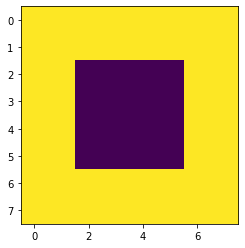

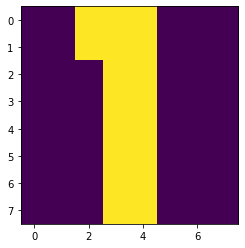

In [2]:
# #initiate
# zero = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
# one = [-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1]
# s=[(np.array(zero),0) , (np.array(one),1)]
s=[[1,-1,-1,1]]
for v in s:
    plt.imshow(v[0].reshape(8,8))
    plt.show()

In [4]:
#Calculate Haming Distance
h_distance = (s[0][0] != s[1][0]).sum()
print("Haming Distance:",h_distance)

Haming Distance: 46


In [7]:
#learning
W = np.zeros((64,64))
for v in s:
    W = np.matmul(v[0][np.newaxis].T,v[0][np.newaxis]) + W
W = W-np.diag(np.full(64,len(s)))

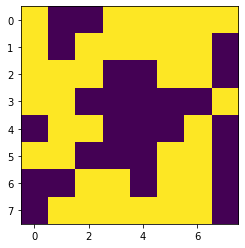

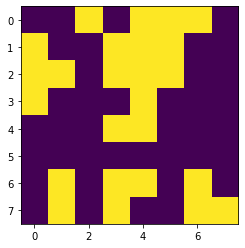

In [8]:
#make noised inputs
s_noised = []
for v in s:
    v_temp = v[0].copy()
    noise_index = random.sample(range(len(v_temp)),int(len(v_temp)*0.3))
    for i in noise_index:
        v_temp[i] = v_temp[i] * -1
    s_noised.append((v_temp,v[1]))
    plt.imshow(v_temp.reshape(8,8))
    plt.show()

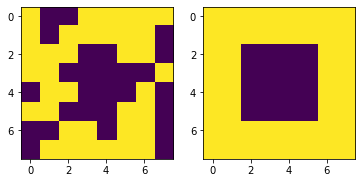

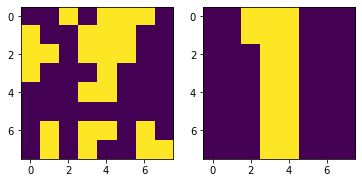

In [17]:
#find outputs
conv = False
while not conv:
	outputs=[]
	for v in s_noised:
		input_vector=v[0].copy()
		output_vector = input_vector.copy()
		random_order = random.sample(range(len(output_vector)),len(output_vector))
		for i in random_order:
			net = input_vector[i] + np.matmul(output_vector,W[:,i])
			if net != 0 :
				output_vector[i] = np.sign(net)
		for vector in s:
			if (output_vector == vector[0]).all():
				outputs.append((v[0],vector[0]))			
	if(len(outputs)==len(s_noised)):
		conv=True
for output in outputs:
	plt.subplot(121)
	plt.imshow(output[0].reshape(8,8))
	plt.subplot(122)
	plt.imshow(output[1].reshape(8,8))
	plt.show()